In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2019-02-27 18:28:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [text/plain]
Saving to: ‘car.data’

car.data            100%[=====================>]  50.65K   253KB/s   in 0.2s   

2019-02-27 18:28:51 (253 KB/s) - ‘car.data’ saved [51867/51867]



In [31]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

In [32]:
column_names = ["buying" , "maint" , "doors" , "persons" , "lug_boot" , "safety" , "class"]

Data = pd.read_csv("car.data" , sep = ',' , names=column_names)

Data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [34]:
Data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,more,small,high,unacc
freq,432,432,432,576,576,576,1210


In [35]:
Data.isna().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [36]:
Data.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

All Columns are object values , So all need to be encoded 

In [37]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

for i in Data.columns :
    Data[i] = Le.fit_transform(Data[i])
    
Data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Building Feature Set

In [38]:
X = Data.iloc[:,:6].values.astype(np.float32)
Y = Data.iloc[:,6].values.astype(np.int32)

In [39]:
print(X.shape)
print(Y.shape)

(1728, 6)
(1728,)


Creating Training and Testing sets 

In [40]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.25 , random_state = 3)

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(1296, 6)
(432, 6)
(1296,)
(432,)


Scaling the data 

In [41]:
from sklearn.preprocessing import StandardScaler 

Scale = StandardScaler()

Xtrain = Scale.fit_transform(Xtrain)
Xtest = Scale.transform(Xtest)

print(Xtrain.shape)
print(Xtest.shape)  # Shapes didn't change and we're good to go 

(1296, 6)
(432, 6)


Building model

In [42]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators = 3)

model.fit(Xtrain , Ytrain)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.9305555555555556


Finding out best Estimator values between 1 and 10

In [43]:
est = []
acc = []

for estimator in range(1,11):
    model = RandomForestClassifier(n_estimators = estimator)
    model.fit(Xtrain , Ytrain)
    print(" Accuracy at " , estimator , "estimator" , model.score(Xtest , Ytest))
    est.append(estimator)
    acc.append(model.score(Xtest , Ytest))

 Accuracy at  1 estimator 0.875
 Accuracy at  2 estimator 0.8541666666666666
 Accuracy at  3 estimator 0.9444444444444444
 Accuracy at  4 estimator 0.9097222222222222
 Accuracy at  5 estimator 0.9259259259259259
 Accuracy at  6 estimator 0.9351851851851852
 Accuracy at  7 estimator 0.9560185185185185
 Accuracy at  8 estimator 0.9375
 Accuracy at  9 estimator 0.9444444444444444
 Accuracy at  10 estimator 0.9351851851851852


The best Accuracy was at 7 estimators which was -> 0.956 %

Estimator vs Acc graph

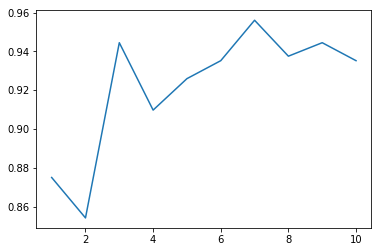

In [45]:
plt.plot(est , acc)
plt.show()